# Encoding

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import IBMQ, Aer
backend = Aer.get_backend('statevector_simulator')

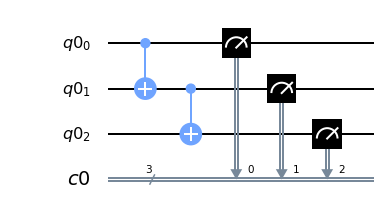

In [2]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.cx(0,1)
qc.cx(1,2)
qc.measure(q,c)
qc.draw(output="mpl")

In [3]:
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


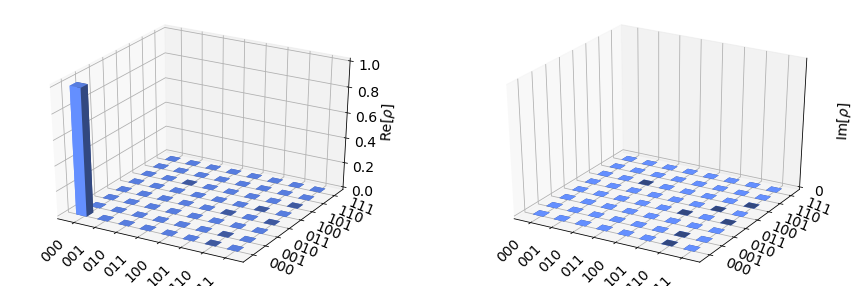

In [4]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## When the input state is |1>

In [5]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
qc.x(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure(q,c)
qc.draw(output="mpl")
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)

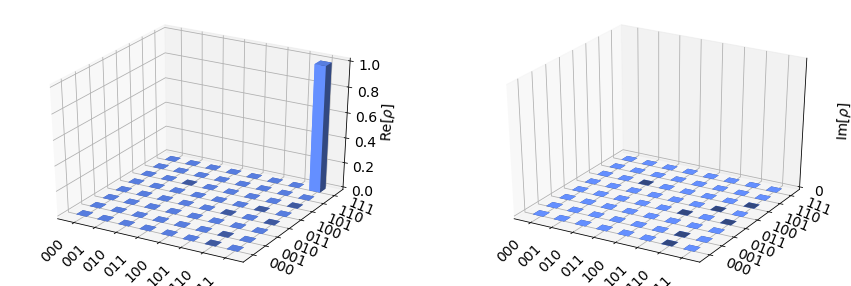

In [6]:
plot_state_city(outputstate)

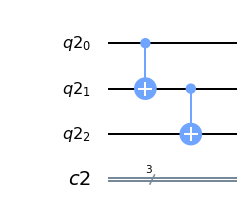

In [7]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.cx(0,1)
qc.cx(1,2)
# qc.measure(q,c)
qc.draw(output="mpl")

# Encoding and correction

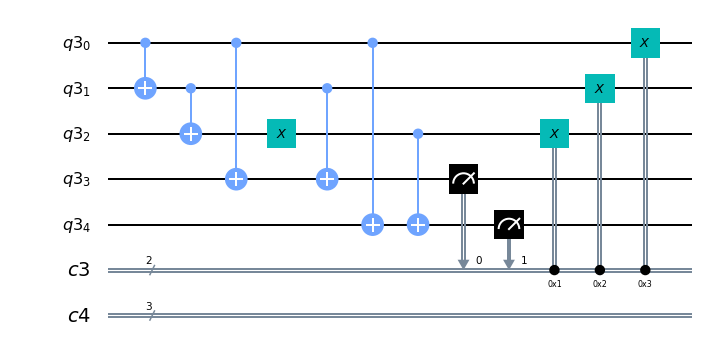

In [8]:
q = QuantumRegister(5)
s = ClassicalRegister(2)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,s,c)

qc.cx(0,1)
qc.cx(1,2)

"""
Error
"""
qc.x(2)

qc.cx(0,3)
qc.cx(1,3)
qc.cx(0,4)
qc.cx(2,4)

qc.measure(q[3],s[0])
qc.measure(q[4],s[1])

qc.x(q[2]).c_if(s, 1)
qc.x(q[1]).c_if(s, 2)
qc.x(q[0]).c_if(s, 3)

qc.draw(output="mpl")

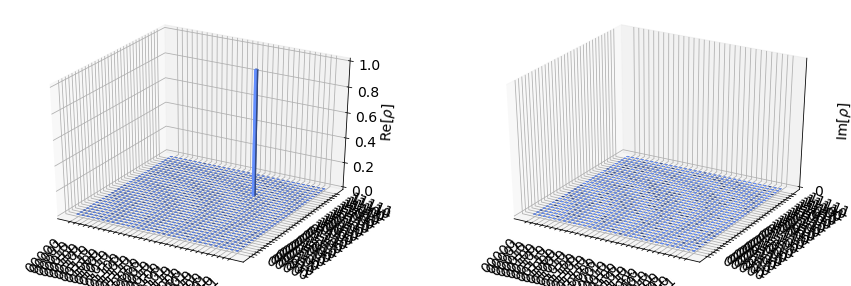

In [9]:
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc, decimals=3)
plot_state_city(outputstate)

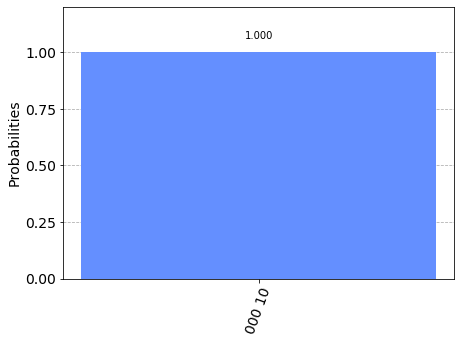

In [14]:
from qiskit import BasicAer
backend2 = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend2)
results = job.result()
answer = results.get_counts(qc)

from qiskit.tools.visualization import plot_histogram
plot_histogram(answer)